In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
fiatdf = pd.read_csv("fiat.csv")
print(fiatdf)

        ID   model  engine_power  age_in_days      km  previous_owners  \
0        1  lounge            51          882   25000                1   
1        2     pop            51         1186   32500                1   
2        3   sport            74         4658  142228                1   
3        4  lounge            51         2739  160000                1   
4        5     pop            73         3074  106880                1   
...    ...     ...           ...          ...     ...              ...   
1533  1534   sport            51         3712  115280                1   
1534  1535  lounge            74         3835  112000                1   
1535  1536     pop            51         2223   60457                1   
1536  1537  lounge            51         2557   80750                1   
1537  1538     pop            51         1766   54276                1   

            lat        lon  price  
0     44.907242   8.611560   8900  
1     45.666359  12.241890   8800  
2  

In [2]:
print(fiatdf.shape)

(1538, 9)


In [3]:
print(fiatdf.isna().sum())

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64


In [4]:
fiatdetails = fiatdf.drop(columns=['ID','model','lat','lon'])
print(fiatdetails.corr().to_string())                          
                                   

                 engine_power  age_in_days        km  previous_owners     price
engine_power         1.000000     0.319190  0.285495        -0.005030 -0.277235
age_in_days          0.319190     1.000000  0.833890         0.075775 -0.893328
km                   0.285495     0.833890  1.000000         0.097539 -0.859373
previous_owners     -0.005030     0.075775  0.097539         1.000000 -0.076274
price               -0.277235    -0.893328 -0.859373        -0.076274  1.000000


In [5]:
dfsport = fiatdf.loc[fiatdf["model"] == "sport"]
dflounge = fiatdf.loc[fiatdf["model"] == "lounge"]
dfpop = fiatdf.loc[fiatdf["model"] == "pop"]
print(dfsport.shape)
print(dflounge.shape)
print(dfpop.shape)

(86, 9)
(1094, 9)
(358, 9)


In [6]:
print(dfsport['km'].max())
print(dfsport['km'].min())
print(dfsport['km'].mean())


190000
6200
103382.80232558139


In [7]:
print(dfsport.describe().to_string())

                ID  engine_power  age_in_days             km  previous_owners        lat        lon         price
count    86.000000     86.000000    86.000000      86.000000        86.000000  86.000000  86.000000     86.000000
mean    724.406977     55.465116  3310.372093  103382.802326         1.267442  43.799563  11.436682   6275.406977
std     489.008610      8.210034  1165.134994   43041.072473         0.602435   2.126544   2.650824   1916.322860
min       3.000000     51.000000   517.000000    6200.000000         1.000000  38.112740   7.330990   3800.000000
25%     227.750000     51.000000  3020.750000   72425.000000         1.000000  41.757082   9.205970   4892.500000
50%     765.500000     51.000000  3684.000000  102400.000000         1.000000  45.013901  11.330880   5800.000000
75%    1082.000000     56.250000  4139.000000  129973.000000         1.000000  45.526340  13.233512   6900.000000
max    1534.000000     74.000000  4658.000000  190000.000000         4.000000  46.792019

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
x=dfsport.drop(columns=["ID","model","engine_power","lat","lon","price"])
y=dfsport["price"]
print(x.to_string())
print(y.to_string())

      age_in_days      km  previous_owners
2            4658  142228                1
8            4049   76000                1
9            3653   89000                1
27           3531  100000                1
33           3927  140000                2
38            790   43100                1
40           4139  119000                1
48           3684  160000                1
49           4596  107000                1
51            790   35000                1
53           3288   71900                1
67           4261  188000                1
77           2739   77149                3
81           4292  145000                3
95           4292  165600                1
97           2009   86000                2
114          4018  102000                1
132          3988  175000                1
148          4383   74000                1
172          4077  124000                1
214          3592   99180                1
225          3896  120000                1
232        

In [10]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [11]:
import warnings
warnings.filterwarnings("ignore")
ans = model.predict([[2190,70000,1],[2190,70000,2]])
print(ans)

[8017.82458566 7910.56801183]


In [12]:
newdf=fiatdf.drop(columns=["ID","engine_power","lat","lon","price"])
print(newdf.to_string())

       model  age_in_days      km  previous_owners
0     lounge          882   25000                1
1        pop         1186   32500                1
2      sport         4658  142228                1
3     lounge         2739  160000                1
4        pop         3074  106880                1
5        pop         3623   70225                1
6     lounge          731   11600                1
7     lounge         1521   49076                1
8      sport         4049   76000                1
9      sport         3653   89000                1
10       pop          790   43286                1
11    lounge          366   17500                1
12    lounge          456   18450                1
13       pop         3835  120000                1
14    lounge         1035   40500                1
15    lounge         1096   28200                1
16    lounge         4200  110000                1
17       pop         2223   96848                1
18    lounge         2861   310

In [13]:
newdf1 = pd.get_dummies(newdf,dtype=int)
print(newdf1.to_string())

      age_in_days      km  previous_owners  model_lounge  model_pop  model_sport
0             882   25000                1             1          0            0
1            1186   32500                1             0          1            0
2            4658  142228                1             0          0            1
3            2739  160000                1             1          0            0
4            3074  106880                1             0          1            0
5            3623   70225                1             0          1            0
6             731   11600                1             1          0            0
7            1521   49076                1             1          0            0
8            4049   76000                1             0          0            1
9            3653   89000                1             0          0            1
10            790   43286                1             0          1            0
11            366   17500   

In [15]:
X1 = newdf1
Y1 = fiatdf['price']
reg = LinearRegression()
reg.fit(X1,Y1)

LinearRegression()

In [16]:
ans=reg.predict([[1096,28200,1,0,0,1],[2190,70000,1,0,0,1]])
print(ans)

[9541.41308006 7842.45026907]


In [17]:
n=int(input("Enter the number of models"))
ls=[]
for i in range(1,n+1):
    age_day=int(input("Enter the age of day : "))
    km=int(input("Enter the km :"))
    pre_ow=int(input("Enter the previous_owners : "))
    mod_l=int(input("Enter the model lounge : "))
    mod_p=int(input("Enter the model pop : "))
    mod_s=int(input("Enter the model sport : "))
    l1=[age_day,km,pre_ow,mod_l,mod_p,mod_s]
    ls.append(l1)
ans2= reg.predict(ls)
print(ans2)


Enter the number of models 1
Enter the age of day :  731
Enter the km : 11600
Enter the previous_owners :  1
Enter the model lounge :  1
Enter the model pop :  0
Enter the model sport :  0


[10194.20369119]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X1,Y1,test_size=0.33)

In [20]:
print(x_train.shape)
print(x_test.shape)

(1030, 6)
(508, 6)


In [21]:
finalans = LinearRegression()
finalans.fit(x_train,y_train)
finalans.predict(x_test)

array([ 7780.52905554, 10041.40276979,  6976.96523266,  9151.86704116,
       10120.07886673,  9400.5236358 ,  9333.32509045, 10325.11805388,
       10058.56850091,  7971.05290791,  5884.82814104,  6063.16769861,
        6247.09509652, 10049.59088758,  9470.32374655, 10330.03769645,
        6034.6358462 ,  7049.26794549,  9589.51042858,  7010.89901889,
        7895.67046092,  8849.71793172,  9571.80780743,  7341.39754853,
        9792.50352464, 10396.15506439,  5464.43026402,  6585.90451771,
        7915.39888616, 10360.42327429,  4257.51672666, 10348.05089015,
        8411.47488359, 10007.49549777,  9575.46290568, 10442.89924942,
        9068.48831452,  8836.50931711,  7631.34483269,  9870.01528807,
        9155.11723764, 10385.49183   ,  9855.7930281 ,  4120.24655095,
        9242.82496778,  4796.81878713, 10133.17768986,  9824.69185238,
        9056.28257947,  7370.38602721, 10063.42932618,  9979.25498191,
        9858.22723977,  7171.19561896,  9693.29551882, 10398.60196261,
      

In [33]:
x_train,x_test,y_train,y_test =train_test_split(X1,Y1,test_size=0.33)
finalans = LinearRegression()
finalans.fit(x_train,y_train)
ans1=finalans.predict(x_test)
print(ans1)

[10228.71190685  7923.57745174  8619.66071899 10406.41426198
  7443.30238613  8387.71945363  6623.86293687  7871.5522796
  4433.69537721  9735.28523314  5513.53441117 10325.70681282
 10344.01005879  6689.63649003 10397.95721067  8477.58286685
  9034.75401207  4978.15956318  9289.52833581 10363.0111484
  7004.89883218  9075.79863381  7763.80805235  9317.34770933
  9739.56600385  9884.96004459 10315.77529361 10464.82304212
  9695.18014788  9648.53818756 10104.66385485 10429.48955526
  8697.05855012  7723.51855246  8362.17073615  6327.47943562
  9867.46753308  7034.43989613  9817.56918798  9860.2838386
  8400.16273959 10193.02605673 10355.98359185  5672.48576682
  6770.85577338  7184.96608874  7631.88997964  8917.91533134
  8754.85593781 10104.36465049 10020.47256177 10393.3554607
  7428.95153709  6162.15442153  5458.12465801 10351.99176799
  6436.67376288  8786.4723005  10558.75702961  5514.42091609
  9534.40754686  5007.07747592  7891.37658347  7050.75596704
  9803.20836575  9315.307477

In [37]:
x_train,x_test,y_train,y_test =train_test_split(X1,Y1,test_size=0.33)
finalans = LinearRegression()
finalans.fit(x_train,y_train)
ans2=finalans.predict(x_test)
print(ans2)

[ 6977.9376618  10025.2995178   6143.60639228  9846.25238069
  7988.77274123  9827.93396603 10106.3047335  10218.3168791
 10008.31591316  8300.65975999  9786.83160008 10155.86158595
  9857.93047192 10350.95727532 10580.74566488  9947.07308982
  8552.81240718  8600.3986229   9501.55110563  7088.99352763
  7462.19857516  8255.07508054  7646.80353399  5140.94054715
  8900.06123723  7066.30349172  5290.4707705   9151.59540838
  9650.95310175  9845.16373385  9026.67915046 10365.0018456
 10032.10431803 10086.96736145  6414.21201936 10068.11513754
 10120.06985093  8682.78276602  6684.13068355  5887.77411019
  5953.15721153  9757.39324386  9896.23452842 10239.54776493
  9451.21685836  9837.34645304  9520.3873857   6641.83554004
  6774.76539034  7545.27408135  8883.27427327  9919.68374049
  9273.97410858  8085.99793955  9950.16775405 10177.64121129
 10040.84283554  9758.16300095 10312.84574012  9937.27980366
  9472.60758663 10532.05616673  8358.22940553 10105.62413985
  9993.4453094   6796.3961

<Axes: xlabel='km', ylabel='price'>

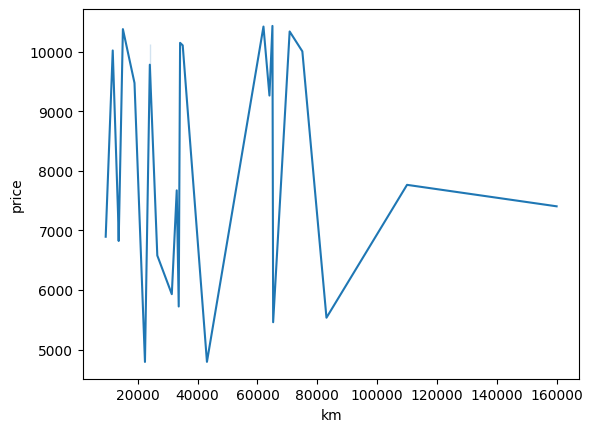

In [40]:
import seaborn as sns
import matplotlib as plt
result=pd.DataFrame(columns=['km','price'])
result['km']=x_test['km']
result['price'] =ans1
sns.lineplot(x='km',y='price',data=result.head(25))

<Axes: xlabel='km', ylabel='price'>

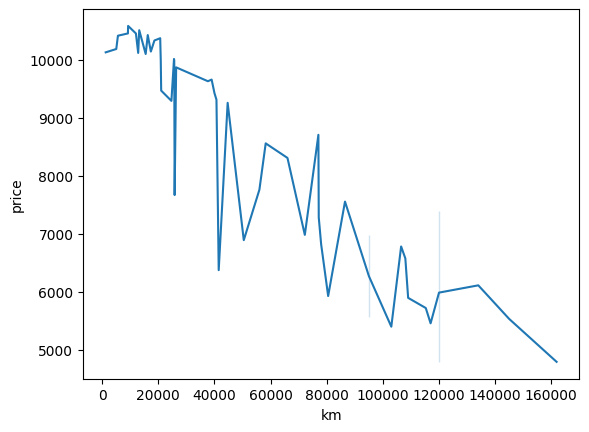

In [41]:
result1 = pd.DataFrame(columns= ["km","price"])
result1["km"] = x_test_1["km"]
result1["price"] = ans1
sns.lineplot(x="km",y= "price",data = result1.head(50))


<Axes: xlabel='km', ylabel='price'>

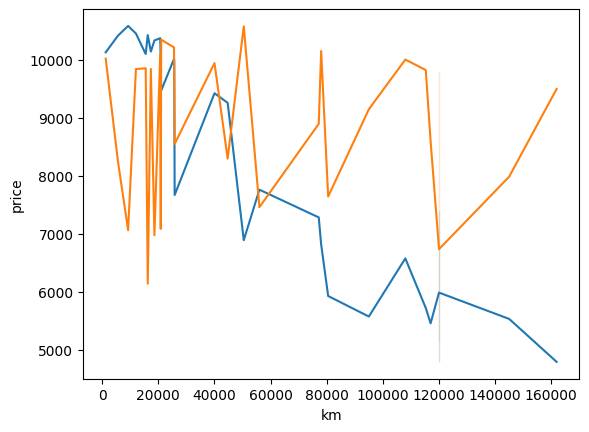

In [47]:
result1 = pd.DataFrame(columns= ["km","price"])
result2 = pd.DataFrame(columns= ["km","price"])
result1["km"] = x_test_1["km"]
result1["price"] = ans1
result2["km"] = x_test_1["km"]
result2["price"] = ans2
sns.lineplot(x="km",y= "price",data = result1.head(30))
sns.lineplot(x="km",y= "price",data = result2.head(30))

<Axes: xlabel='km', ylabel='price'>

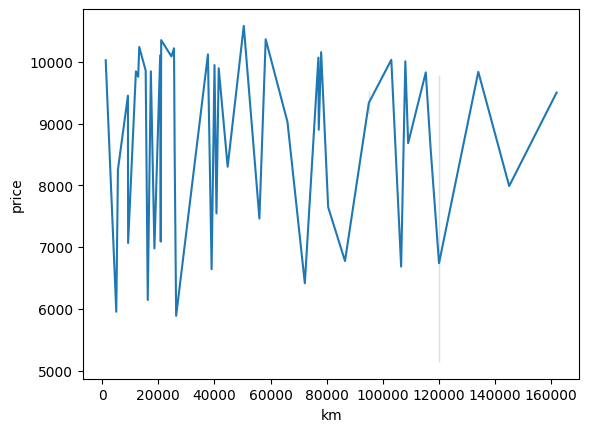

In [50]:
result2 = pd.DataFrame(columns= ["km","price"])
result2["km"] = x_test_1["km"]
result2["price"] = ans2
sns.lineplot(x="km",y= "price",data = result2.head(50))